# Step 1: Acquire the dataset

We got the data from this google drive link. https://drive.google.com/drive/folders/16BK8_d1V-A3M1WQ0neaeCwqrHPfzH7QS?usp=sharing . This link is provided from Wei Shen where he gotten it from Mr.Afiq, who is the founder of Chili Lado.

We decided not to use all the datasets in this google drive, however, we only selected the datasets that are relevant to our analysis. The selected the Product Overview datasets from the Product Folder. 

At first we downloaded all the dataset into our local drive by using the dowload all button.

![DownloadAll](ChiliLadoData/DownloadAll.png)

All the datasets is downloaded in this zipped file.

![ZippedFile](ChiliLadoData/ZippedFile.png)
![DownloadedFile](ChiliLadoData/DownloadedFile.png)

Based on our observation, the zip include the Product Overview dataset which is from May 2023 to September 2023. All of them has 22 Column, however it has different number of rows. May, June, July, August, September has 32,31,32,32,31 rows respectively. The column names are:
1. Date
2. Product Visitors (Visit)
3. Product Page Views
4. Items Visited
5. Product Bounce Visitors
6. Product Bounce Rate
7. Search Clicks
8. Likes
9. Product Visitors (Add to Cart)
10. Units (Add to Cart)
11. Conversion Rate (Add to Cart)
12. Buyers (Placed Order)
13. Units (Placed Order)
14. Items Placed
15. Sales (Placed Order)(MYR)
16. Conversion Rate (Placed Order)
17. Buyers (Confirmed Order)
18. Units (Confirmed Order)
19. Items Confirmed
20. Sales (Confiremd Order)(MYR)
21. Conversion Rate (Confirmed Order)
22. Converison Rate (Placed to Confirmed)

We first combine all the 5 files together, however we decided to do it with copy and paste instead of using python code because it only has 5 files. We use Ctrl+C to copy all the rows and use Ctrl+V to paste the copied rows into a new Excel File called MergedFile.xlsx.

![CopiedFile](ChiliLadoData/CopiedFile.png)

![PasteFile](ChiliLadoData/PasteFile.png)

We copied all five datasets into the MergedFile. However, for May 2023, we copy the whole file including the column names, while for other months,we only copied the data. We pasted the data beneath May 2023. We followed the same process for July 2023 and subsequent months.

![MayJune](ChiliLadoData/MayJune.png)

To check if the data is merged correctly, we calculate the total number of rows by adding the number of days in these 5 months and the row contains attribute name which is 31 + 30 + 31 + 31 + + 30 + 1 = 154, as our MergedFile has 154 rows means that we had merged it correctly.

To fulfill our objective, we require a different set of data sourced from the Dashboard of the year 2023.

![Dashboard2023](ChiliLadoData/Dashboard2023.png)

We get these following columns:

1. Numbers of buyers
2. Numbers of new buyers
3. Numbers of existing buyers

We replicate the procedure by copying the column and its data as the method above. Then, we paste this data into our recently created merged file.

![AddedColumn](ChiliLadoData/AddedColumn.png)

We found out that the figures in repeat purchase rate numbers are inaccurate. So, We perform data augmentation for two columns: the percentage of new buyers and the percentage of repeat buyers by using the data inside the dataset and Excel Function.

![NewCalculation](ChiliLadoData/NewCalculation.png)

![RepeatCalculation](ChiliLadoData/RepeatCalculation.png)

We use If in our calculation because if the number of buyer is equal to zero, it might have division by zero error. If the number of buyers equals zero, the output is set to zero, otherwise, the division operation proceeds.  We also convert our calculation to percentage by using this function.

![Percentage](ChiliLadoData/Percentage.png)

We decide to use all these steps in Excel rather in Python because it is faster than code, also we want to make direct changes to our dataset rather than temporary changes only.

We have 27 column and 154 rows inside the dataset. 

Initially, almost all the data in the Excel file was not numerical data.

![ConvertData](ChiliLadoData/ConvertData.png)

Therefore, we converted all the data in the dataset into numerical values by selecting the "Convert to Number" option in Excel to prevent potential errors. You can identify non-numeric data when the left upper corner of the cell is marked in green.

![Number](ChiliLadoData/Number.png)

If all the cells are white, it indicates that we have successfully converted the data into numerical values. Now, we can proceed with using Python for data preprocessing.

We've also converted the date column to ensure Python recognizes it as a date, preventing unintentional calculations. This format ensures proper identification as a date type without triggering any unwanted operations.

![Date](ChiliLadoData/Date.png)

Now the data can be used for the next few steps.


# Step 2: Import the libraries

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error

# Step 3: Import the dataset

We imported the datasets from a local directory. We create a folder called ChiliLadoData and store all the datasets and images we use in that folder.

In [226]:
df = pd.read_excel('MergedFile.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   153 non-null    datetime64[ns]
 1   Product Visitors (Visit)               153 non-null    int64         
 2   Product Page Views                     153 non-null    int64         
 3   Items Visited                          153 non-null    int64         
 4   Product Bounce Visitors                153 non-null    int64         
 5   Product Bounce Rate                    153 non-null    float64       
 6   Search Clicks                          153 non-null    int64         
 7   Likes                                  153 non-null    int64         
 8   Product Visitors (Add to Cart)         153 non-null    int64         
 9   Units (Add to Cart)                    153 non-null    int64     

In [227]:
print(df)

          Date  Product Visitors (Visit)  Product Page Views  Items Visited   
0   2023-05-01                         1                   1              1  \
1   2023-05-02                         3                   6              1   
2   2023-05-03                         4                   7              1   
3   2023-05-04                         1                   3              1   
4   2023-05-05                         3                  10              1   
..         ...                       ...                 ...            ...   
148 2023-09-26                       222                 497              1   
149 2023-09-27                       140                 284              3   
150 2023-09-28                       150                 359              3   
151 2023-09-29                       149                 275              1   
152 2023-09-30                       121                 232              1   

     Product Bounce Visitors  Product Bounce Rate  

# Step 4a: Feature Selection
The objective of our assignment is to increase sales. However, there are many ways to increase sales. So, we opt for the most important element data in our dataset, which is to analyse the number of customer visting our store (human flow) and the number of sales by using Multiple Linear Regression. Another way to increase sales is to determine the number of return customer and sales by using Single Linear Regression and Multiple Linear Regression.

For Part a, the analysis will be human flow and the number of sales

In [228]:
# DataFrame for objective 1
df1 = df.copy()

# Remove unwanted data columns that are irrelevant to the analysis
drop_columns = ['Product Bounce Visitors', 'Product Bounce Rate','Likes', 'Product Visitors (Add to Cart)',
       'Units (Add to Cart)', 'Conversion Rate (Add to Cart)','Buyers (Placed Order)', 'Units (Placed Order)', 'Items Placed',
       'Sales (Placed Order) (MYR)', 'Conversion Rate (Placed Order)','Buyers (Confirmed Order)', 'Units (Confirmed Order)',
       'Items Confirmed','Conversion Rate (Confirmed Order)','Conversion Rate (Placed to Confirmed)', 'Numbers of buyers',
       'Numbers of new buyers', 'Numbers of existing buyers','Percentage of new buyers', 'Percentage of repeat buyers']

df1.drop(columns=drop_columns, inplace=True)

display(df1)

,Date,Product Visitors (Visit),Product Page Views,Items Visited,Search Clicks,Sales (Confirmed Order) (MYR)
0,2023-05-01,1,1,1,0,0.00
1,2023-05-02,3,6,1,1,58.90
2,2023-05-03,4,7,1,3,0.00
3,2023-05-04,1,3,1,1,0.00
4,2023-05-05,3,10,1,2,0.00
...,...,...,...,...,...,...
148,2023-09-26,222,497,1,67,1305.30
149,2023-09-27,140,284,3,30,502.69
150,2023-09-28,150,359,3,41,629.92
151,2023-09-29,149,275,1,30,433.53


# Step 5a: Clean the data by dentifying and handling missing value, redundancy and outliers

In [229]:
# Determine the missing value of each column by using .isna(), use .sum() to sum all the missing value
print("Find missing value of each column using isna()")
print (df1.isna().sum())

Find missing value of each column using isna()
Date                             0
Product Visitors (Visit)         0
Product Page Views               0
Items Visited                    0
Search Clicks                    0
Sales (Confirmed Order) (MYR)    0
dtype: int64


Based on above output, we found out that there are no missing value in the dataset, so we do not need to delete or drop any row.

In [230]:
#Determine any redundancy in the dataset
# Use .duplicate is to check if there is any duplicate data
duplicate_rows = df1.duplicated().sum()
duplicate_columns = df1.T.duplicated().sum()

print("Find any duplicate values:")
duplicate_rows, duplicate_columns

Find any duplicate values:


(0, 0)

Based on above result, we found out that there are no duplicate data in this dataset, so there are no redundancy.

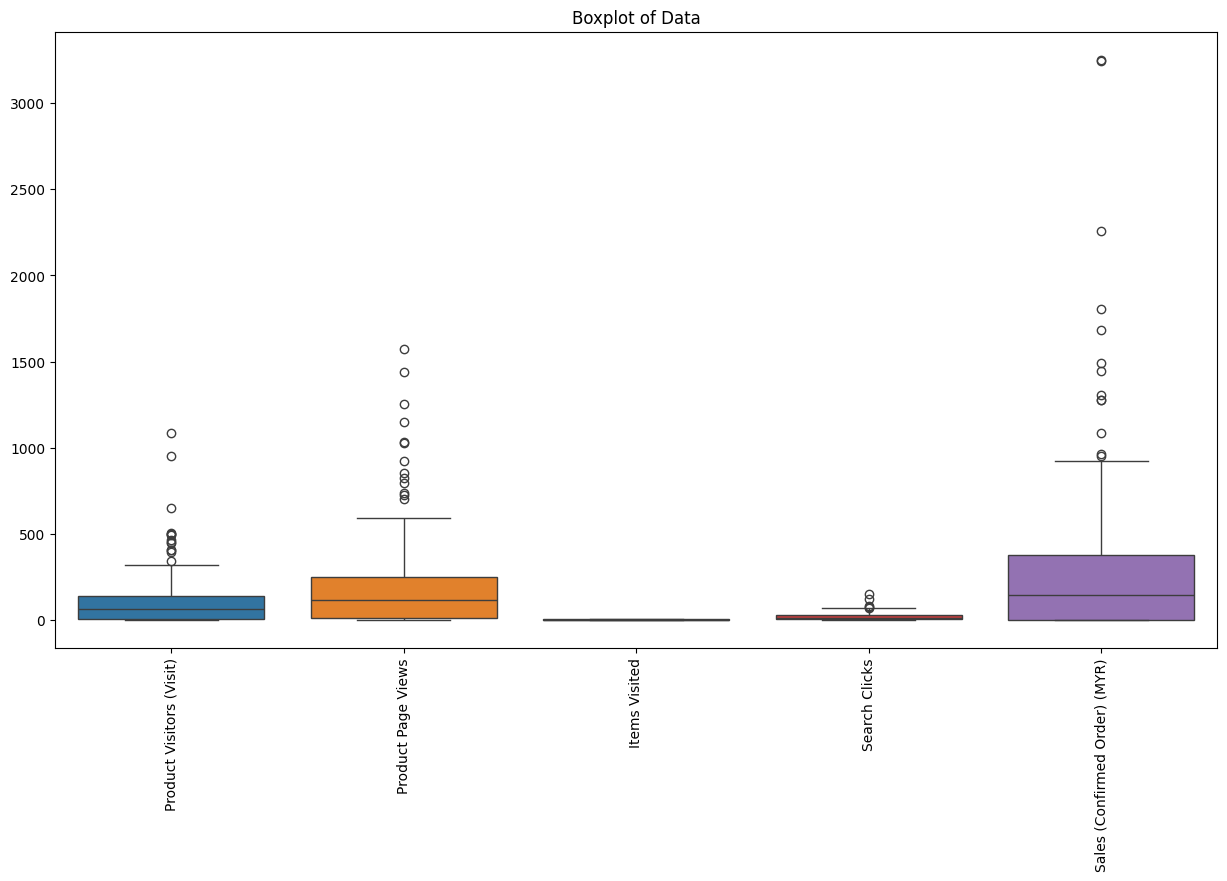

In [231]:
# To check for outliers in the data

# Exclude the 'Date' column
outliersdf = df1.copy()

# Create a boxplot to visualize the outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=outliersdf)
plt.title("Boxplot of Data")
plt.xticks(rotation=90)
plt.show()

The above figure is the boxplot that used to identify the outliers in the datasets.


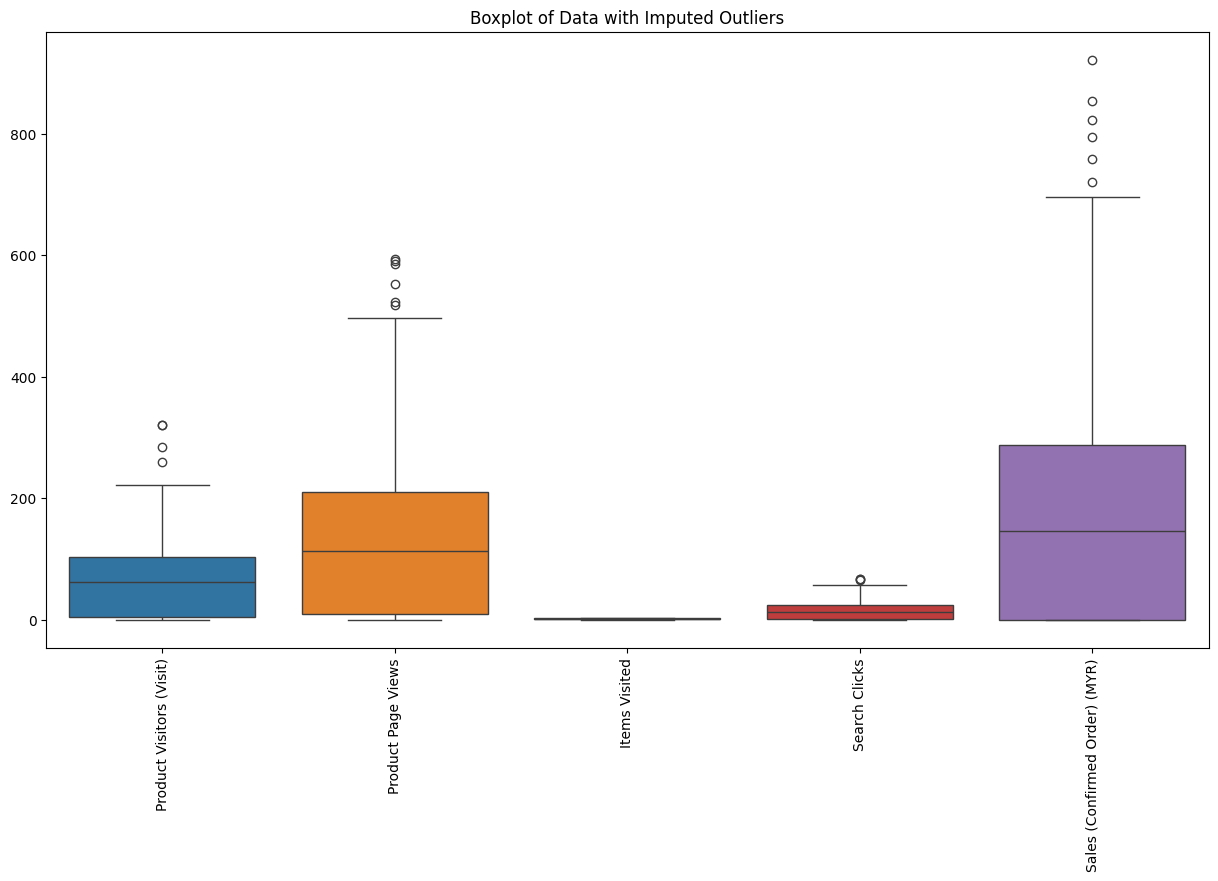

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'outliersdf' is your original DataFrame

# Calculate the first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1 = outliersdf.quantile(0.25, numeric_only=True)
Q3 = outliersdf.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Function to replace outliers with the median (or mean)
def impute_outlier_with_median(outliersdf, q1, q3, iqr):
    for col in outliersdf.select_dtypes(include=np.number).columns:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        median_value = outliersdf[col].median()

        # Replace outliers with median (you can also use mean or other metrics)
        outliersdf[col] = np.where((outliersdf[col] < lower_bound) | (outliersdf[col] > upper_bound), median_value, outliersdf[col])
    return outliersdf

# Impute outliers in the DataFrame
df_imputed = impute_outlier_with_median(outliersdf.copy(), Q1, Q3, IQR)


df1 = df_imputed.copy()
# Create a boxplot to visualize the DataFrame with imputed outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_imputed)
plt.title("Boxplot of Data with Imputed Outliers")
plt.xticks(rotation=90)
plt.show()


The above figure is the boxplot of the dataset after detection and removal of outliers.

In [233]:
#Now you can display df1 with cleaned data
display(df1)


,Date,Product Visitors (Visit),Product Page Views,Items Visited,Search Clicks,Sales (Confirmed Order) (MYR)
0,2023-05-01,1.0,1.0,1.0,0.0,0.00
1,2023-05-02,3.0,6.0,1.0,1.0,58.90
2,2023-05-03,4.0,7.0,1.0,3.0,0.00
3,2023-05-04,1.0,3.0,1.0,1.0,0.00
4,2023-05-05,3.0,10.0,1.0,2.0,0.00
...,...,...,...,...,...,...
148,2023-09-26,222.0,497.0,1.0,67.0,145.60
149,2023-09-27,140.0,284.0,3.0,30.0,502.69
150,2023-09-28,150.0,359.0,3.0,41.0,629.92
151,2023-09-29,149.0,275.0,1.0,30.0,433.53


# Step 5a: Encode the categorical data

In [234]:
# We need to determine the categorical data inside the dataset first
# However, by observing the dataset it does not have any categorical data but we can double check it by using .dtypes

print(df1.dtypes)

Date                             datetime64[ns]
Product Visitors (Visit)                float64
Product Page Views                      float64
Items Visited                           float64
Search Clicks                           float64
Sales (Confirmed Order) (MYR)           float64
dtype: object


Based on above output, we can observe that all the data is in numerical format so we do not need to do any encoding.

# Step 6a: Feature Scaling
Scale down the numbers in the dataset
 We chose MinMaxScaler over other scaling methods due to its range from 0 to 1, providing positive values for our features. This is in contrast to feature scaling, which ranges from -1 to 1. The positive range aligns well with our preference for non-negative values, making MinMaxScaler the suitable choice.

In [235]:

# Extract the date column
from sklearn.preprocessing import MinMaxScaler


date_column = df1.iloc[:, 0]

# Min-Max scale all columns except the date column
minmax_data = MinMaxScaler().fit_transform(df1.iloc[:, 1:])

# Combine the Min-Max scaled data with the date column
minmax_frame = pd.DataFrame(data=minmax_data, columns=df1.columns[1:])
minmax_frame.insert(0, df1.columns[0], date_column)

# Print the first few rows
print(minmax_frame)

df1 = minmax_frame


          Date  Product Visitors (Visit)  Product Page Views  Items Visited   
0   2023-05-01                  0.003115            0.001684       0.333333  \
1   2023-05-02                  0.009346            0.010101       0.333333   
2   2023-05-03                  0.012461            0.011785       0.333333   
3   2023-05-04                  0.003115            0.005051       0.333333   
4   2023-05-05                  0.009346            0.016835       0.333333   
..         ...                       ...                 ...            ...   
148 2023-09-26                  0.691589            0.836700       0.333333   
149 2023-09-27                  0.436137            0.478114       1.000000   
150 2023-09-28                  0.467290            0.604377       1.000000   
151 2023-09-29                  0.464174            0.462963       0.333333   
152 2023-09-30                  0.376947            0.390572       0.333333   

     Search Clicks  Sales (Confirmed Order) (MYR)  

Do the MLR

In [236]:
#MLR CODE

# Step 4b: Feature Selection
For Part b, the analysis will be determine number of new and return customer 

In [237]:
# DataFrame for objective 2
df2 = df.copy()

# Remove unwanted data columns that are irrelevant to the analysis
drop_columns = ['Product Visitors (Visit)', 'Product Page Views','Items Visited', 'Product Bounce Visitors', 'Product Bounce Rate',
       'Search Clicks', 'Likes', 'Product Visitors (Add to Cart)','Units (Add to Cart)', 'Conversion Rate (Add to Cart)',
       'Buyers (Placed Order)', 'Units (Placed Order)', 'Items Placed','Sales (Placed Order) (MYR)', 'Conversion Rate (Placed Order)',
       'Buyers (Confirmed Order)', 'Units (Confirmed Order)','Items Confirmed','Conversion Rate (Confirmed Order)','Conversion Rate (Placed to Confirmed)']

df2.drop(columns=drop_columns, inplace=True)

display(df2)

,Date,Sales (Confirmed Order) (MYR),Numbers of buyers,Numbers of new buyers,Numbers of existing buyers,Percentage of new buyers,Percentage of repeat buyers
0,2023-05-01,0.00,0,0,0,0.000000,0.000000
1,2023-05-02,58.90,1,0,1,0.000000,1.000000
2,2023-05-03,0.00,0,0,0,0.000000,0.000000
3,2023-05-04,0.00,0,0,0,0.000000,0.000000
4,2023-05-05,0.00,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...
148,2023-09-26,1305.30,73,54,19,0.739726,0.260274
149,2023-09-27,502.69,26,18,8,0.692308,0.307692
150,2023-09-28,629.92,33,27,6,0.818182,0.181818
151,2023-09-29,433.53,20,15,5,0.750000,0.250000


# Step 5b: Clean the data by dentifying and handling missing value, redundancy and outliers

In [238]:
# Determine the missing value of each column by using .isna(), use .sum() to sum all the missing value
print("Find missing value of each column using isna()")
print (df2.isna().sum())

Find missing value of each column using isna()
Date                             0
Sales (Confirmed Order) (MYR)    0
Numbers of buyers                0
Numbers of new buyers            0
Numbers of existing buyers       0
Percentage of new buyers         0
Percentage of repeat buyers      0
dtype: int64


Based on above output, we found out that there are no missing value in the dataset, so we do not need to delete or drop any row.

In [239]:
#Determine any redundancy in the dataset
# Use .duplicate is to check if there is any duplicate data
duplicate_rows = df2.duplicated().sum()
duplicate_columns = df2.T.duplicated().sum()

print("Find any duplicate values:")
duplicate_rows, duplicate_columns

Find any duplicate values:


(0, 0)

Based on above result, we found out that there are no duplicate data in this dataset, so there are no redundancy.

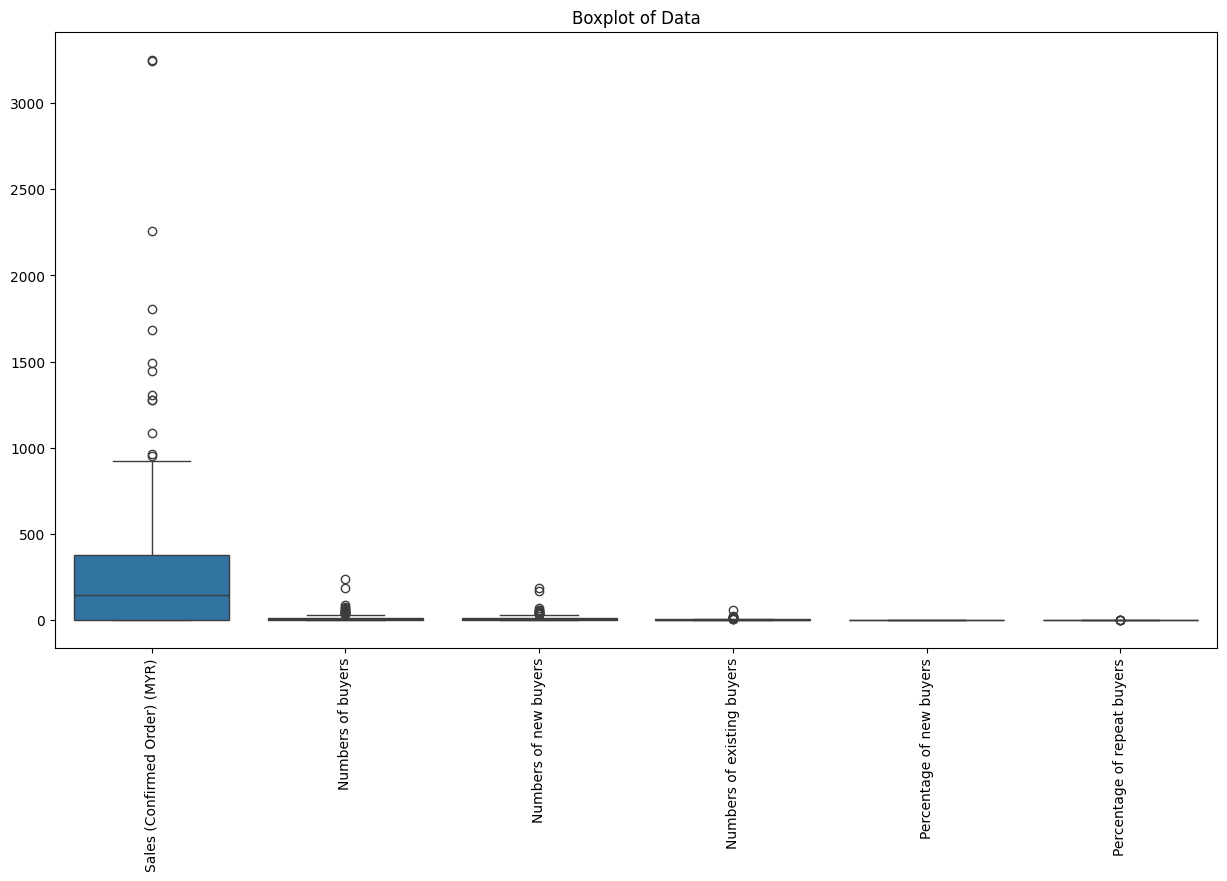

In [240]:
# To check for outliers in the data

# Exclude the 'Date' column
outliersdf2 = df2.copy()

# Create a boxplot to visualize the outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=outliersdf2)
plt.title("Boxplot of Data")
plt.xticks(rotation=90)
plt.show()

The above figure is the boxplot that used to identify the outliers in the datasets.

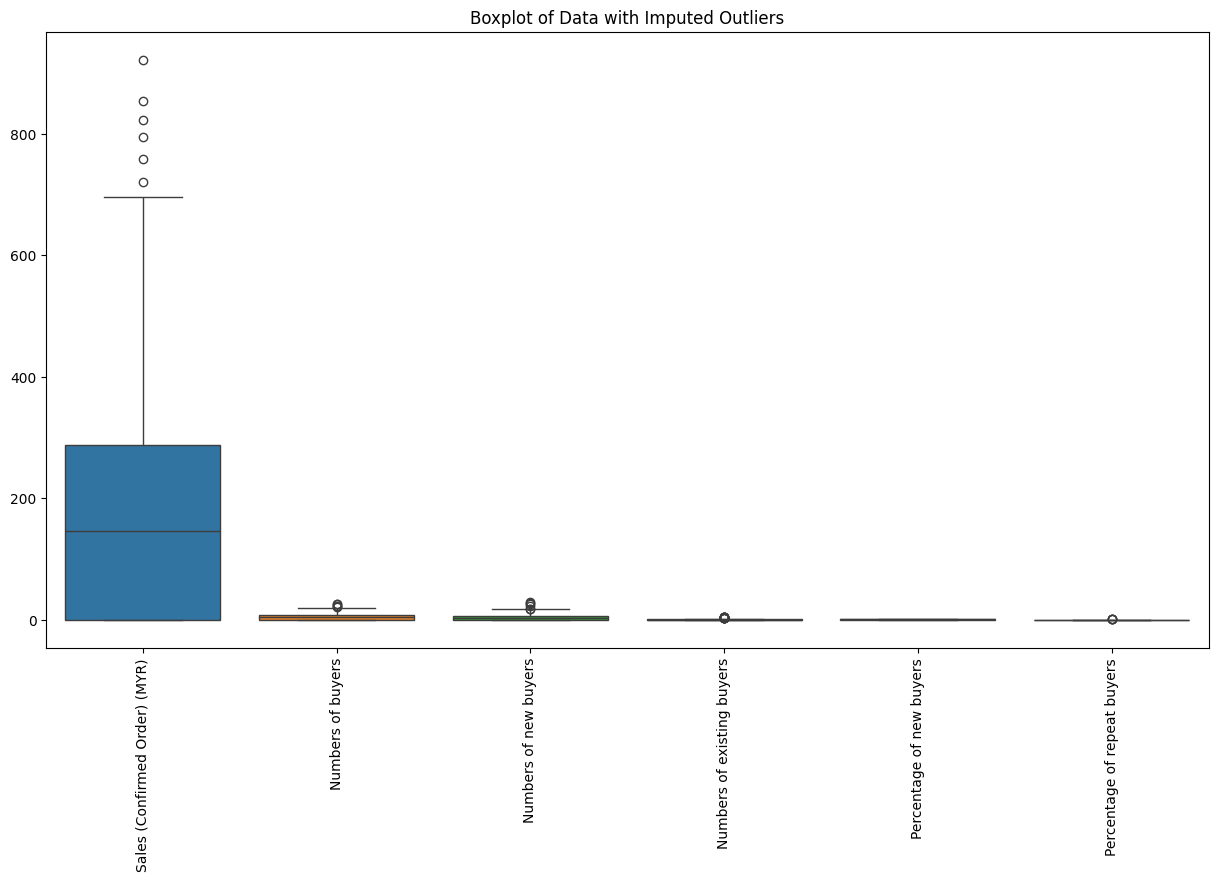

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'outliersdf' is your original DataFrame

# Calculate the first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1 = outliersdf2.quantile(0.25, numeric_only=True)
Q3 = outliersdf2.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Function to replace outliers with the median (or mean)
def impute_outlier_with_median(outliersdf2, q1, q3, iqr):
    for col in outliersdf2.select_dtypes(include=np.number).columns:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        median_value = outliersdf2[col].median()

        # Replace outliers with median (you can also use mean or other metrics)
        outliersdf2[col] = np.where((outliersdf2[col] < lower_bound) | (outliersdf2[col] > upper_bound), median_value, outliersdf2[col])
    return outliersdf2

# Impute outliers in the DataFrame
df_imputed2 = impute_outlier_with_median(outliersdf2.copy(), Q1, Q3, IQR)


df2 = df_imputed2.copy()
# Create a boxplot to visualize the DataFrame with imputed outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_imputed2)
plt.title("Boxplot of Data with Imputed Outliers")
plt.xticks(rotation=90)
plt.show()


The above figure is the boxplot of the dataset after detection and removal of outliers.

In [242]:
# Now you can display df2 with cleaned data
display(df2)


,Date,Sales (Confirmed Order) (MYR),Numbers of buyers,Numbers of new buyers,Numbers of existing buyers,Percentage of new buyers,Percentage of repeat buyers
0,2023-05-01,0.00,0.0,0.0,0.0,0.000000,0.000000
1,2023-05-02,58.90,1.0,0.0,1.0,0.000000,0.000000
2,2023-05-03,0.00,0.0,0.0,0.0,0.000000,0.000000
3,2023-05-04,0.00,0.0,0.0,0.0,0.000000,0.000000
4,2023-05-05,0.00,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
148,2023-09-26,145.60,4.0,3.0,0.0,0.739726,0.260274
149,2023-09-27,502.69,26.0,18.0,0.0,0.692308,0.307692
150,2023-09-28,629.92,4.0,27.0,0.0,0.818182,0.181818
151,2023-09-29,433.53,20.0,15.0,5.0,0.750000,0.250000


# Step 5b: Encode the categorical data

In [243]:
# We need to determine the categorical data inside the dataset first
# However, by observing the dataset it does not have any categorical data but we can double check it by using .dtypes

print(df2.dtypes)

Date                             datetime64[ns]
Sales (Confirmed Order) (MYR)           float64
Numbers of buyers                       float64
Numbers of new buyers                   float64
Numbers of existing buyers              float64
Percentage of new buyers                float64
Percentage of repeat buyers             float64
dtype: object


Based on above output, we can observe that all the data is in numerical format so we do not need to do any encoding.

# Step 6b: Feature Scaling
Scale down the numbers in the dataset
 We chose MinMaxScaler over other scaling methods due to its range from 0 to 1, providing positive values for our features. This is in contrast to feature scaling, which ranges from -1 to 1. The positive range aligns well with our preference for non-negative values, making MinMaxScaler the suitable choice.

In [244]:
# Extract the date column
from sklearn.preprocessing import MinMaxScaler


date_column = df2.iloc[:, 0]

# Min-Max scale all columns except the date column
minmax_data = MinMaxScaler().fit_transform(df2.iloc[:, 1:])

# Combine the Min-Max scaled data with the date column
minmax_frame = pd.DataFrame(data=minmax_data, columns=df2.columns[1:])
minmax_frame.insert(0, df2.columns[0], date_column)

# Print the first few rows
print(minmax_frame)

df2 = minmax_frame.copy()


          Date  Sales (Confirmed Order) (MYR)  Numbers of buyers   
0   2023-05-01                       0.000000           0.000000  \
1   2023-05-02                       0.063885           0.038462   
2   2023-05-03                       0.000000           0.000000   
3   2023-05-04                       0.000000           0.000000   
4   2023-05-05                       0.000000           0.000000   
..         ...                            ...                ...   
148 2023-09-26                       0.157923           0.153846   
149 2023-09-27                       0.545235           1.000000   
150 2023-09-28                       0.683233           0.153846   
151 2023-09-29                       0.470221           0.769231   
152 2023-09-30                       0.168899           0.230769   

     Numbers of new buyers  Numbers of existing buyers   
0                 0.000000                         0.0  \
1                 0.000000                         0.2   
2        

The simple linear regression model below is used to analyze the relationship between the percentage of new buyers and sales(confirmed order) (MYR). Scatter plots and regression lines are then plotted to visualize the results. Pearson's correlation coefficient is used to measure the strength and direction of a linear relationship between two variables.

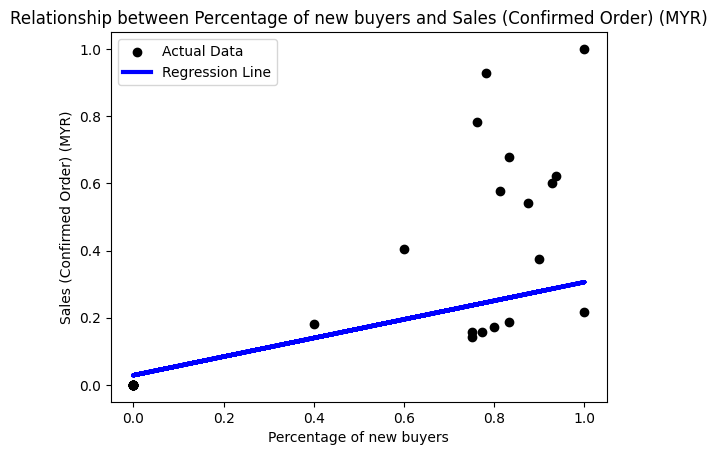

Pearson Correlation Coefficient (r): 0.5624749087808132


In [245]:
#Simple Linear Regression to determine the relationship between the percentage of new buyers and the sales in confirmed order

IV = 'Percentage of new buyers'
DV = 'Sales (Confirmed Order) (MYR)'

x1 = df2[IV]
y1 = df2[DV]


# Split the data into training and testing sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1.values.reshape(-1, 1), y1, test_size=0.20, random_state=42)

# Create a linear regression model
obj2_model1 = LinearRegression()

# Train the model
obj2_model1.fit (x_train1, y_train1)

y_pred1 = obj2_model1.predict(x_test1)

# Plot the actual data and regression line
plt.scatter(x_test1, y_test1, color='black', label='Actual Data')
plt.plot(x_test1, y_pred1, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Percentage of new buyers')
plt.ylabel('Sales (Confirmed Order) (MYR)')
plt.title('Relationship between Percentage of new buyers and Sales (Confirmed Order) (MYR)')
plt.legend()
plt.show()

# Calculate Pearson correlation coefficient (r) between variables
correlation_coefficient, _ = pearsonr(x1, y1)
print(f"Pearson Correlation Coefficient (r): {correlation_coefficient}")

The result of 0.5843 shows that there is a moderate positive linear relationship between the percentage of new buyers and sales in confirmed orders in MYR. The positive r value implies that as the number of new buyers increases, there is a tendency for sales in confirmed orders to increase.

In [246]:
# Calculate Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test1, y_pred1)
print(f"Mean Absolute Error (MAE): {mae1}")

# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test1, y_pred1)
print(f"Mean Squared Error (MSE): {mse1}")

# Calculate R-squared (R2)
r21 = r2_score(y_test1, y_pred1)
print(f"R-squared (R2): {r21}")


rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
print(f"Root Mean Squared Error (RMSE): {rmse1}")


Mean Absolute Error (MAE): 0.1557287631083225
Mean Squared Error (MSE): 0.061653663866352265
R-squared (R2): 0.34088722548671835
Root Mean Squared Error (RMSE): 0.24830155832445408


Existing Buyer

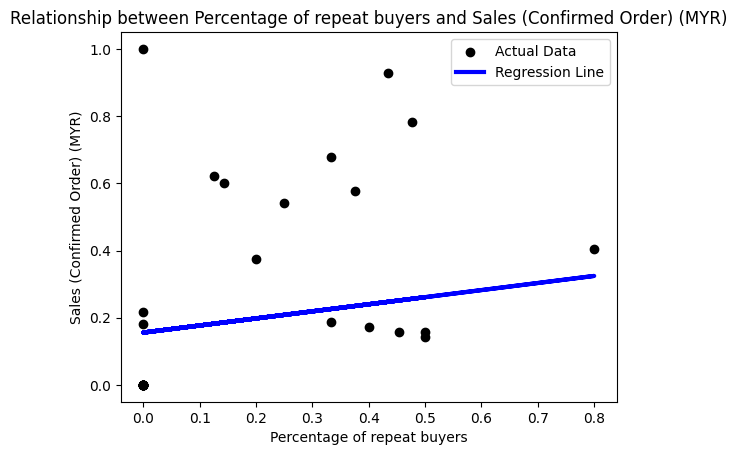

Pearson Correlation Coefficient (r): 0.29567553511225725


In [247]:
#Existing Buyer Code

# Select independent variable (X) and dependent variable (y)
x2 = df2['Percentage of repeat buyers'].values
y2 = df2['Sales (Confirmed Order) (MYR)'].values

# Split dataset into training and testing sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

#Initiate Linear Regression
obj2_model2 = LinearRegression()

#Fit model to training data
obj2_model2.fit(x_train2.reshape(-1, 1), y_train2)

# Generate Prediction on Test Data
y_pred2 = obj2_model2.predict(x_test2.reshape(-1, 1))

# Visualising the regression line
plt.scatter(x_test2, y_test2, color='black', label='Actual Data')
plt.plot(x_test2, y_pred2, color='blue', linewidth=3, label='Regression Line')
plt.title('Relationship between Percentage of repeat buyers and Sales (Confirmed Order) (MYR)')
plt.xlabel('Percentage of repeat buyers')
plt.ylabel('Sales (Confirmed Order) (MYR)')
plt.legend()
plt.show()

# Calculate Pearson correlation coefficient (r) between variables
correlation_coefficient, _ = pearsonr(x2, y2)
print(f"Pearson Correlation Coefficient (r): {correlation_coefficient}")

The result of 0.3232 shows that there is a weak positive linear relationship between the percentage of repeat buyers and sales in confirmed orders in MYR. The positive r value implies that as the number of new buyers increases, there is a tendency for sales in confirmed orders to increase.

In [248]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae2 = mean_absolute_error(y_test2, y_pred2)
print(f"Mean Absolute Error (MAE): {mae2}")

# Calculate Mean Squared Error (MSE)
mse2 = mean_squared_error(y_test2, y_pred2)
print(f"Mean Squared Error (MSE): {mse2}")

# Calculate R-squared (R2)
r22 = r2_score(y_test2, y_pred2)
print(f"R-squared (R2): {r22}")


rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
print(f"Root Mean Squared Error (RMSE): {rmse2}")


Mean Absolute Error (MAE): 0.22513521776646409
Mean Squared Error (MSE): 0.08615952543290184
R-squared (R2): 0.07890561083393577
Root Mean Squared Error (RMSE): 0.29352942856364816
